# Time Series Analysis
  
  ## Predicting Milk Production

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
tsDF = pd.read_csv('./data/monthly_milk_production.csv')
tsDF['midx'] = tsDF['Month'].str[-2:]

tsDF.head(20)

,Month,Production,midx
0,1962-01,578.3,01
1,1962-02,609.8,02
2,1962-03,628.4,03
3,1962-04,665.6,04
4,1962-05,713.8,05
5,1962-06,707.2,06
6,1962-07,628.4,07
7,1962-08,588.1,08
8,1962-09,576.3,09
9,1962-10,566.5,10


## Adding the month period column

In [5]:
tsDF['period'] = range(1,len(tsDF)+1)
tsDF.head(20)

,Month,Production,midx,period
0,1962-01,578.3,01,1
1,1962-02,609.8,02,2
2,1962-03,628.4,03,3
3,1962-04,665.6,04,4
4,1962-05,713.8,05,5
5,1962-06,707.2,06,6
6,1962-07,628.4,07,7
7,1962-08,588.1,08,8
8,1962-09,576.3,09,9
9,1962-10,566.5,10,10


In [6]:
## Identifying the trending line
X = tsDF['period'].iloc[:].values.reshape(-1, 1)  # values converts it into a numpy array
Y = tsDF['Production'].iloc[:].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

# Instantiate a Linear Regression Object
lr_model = LinearRegression()

# Train the model
lr_model.fit(X, Y)

#
y_prediction = lr_model.predict(X)  # make predictions

In [7]:
tsDF['lc'] = y_prediction

In [8]:
tsDF.head(15)

,Month,Production,midx,period,lc
0,1962-01,578.3,01,1,609.821027
1,1962-02,609.8,02,2,611.584519
2,1962-03,628.4,03,3,613.348012
3,1962-04,665.6,04,4,615.111504
4,1962-05,713.8,05,5,616.874996
5,1962-06,707.2,06,6,618.638488
6,1962-07,628.4,07,7,620.401980
7,1962-08,588.1,08,8,622.165472
8,1962-09,576.3,09,9,623.928964
9,1962-10,566.5,10,10,625.692456


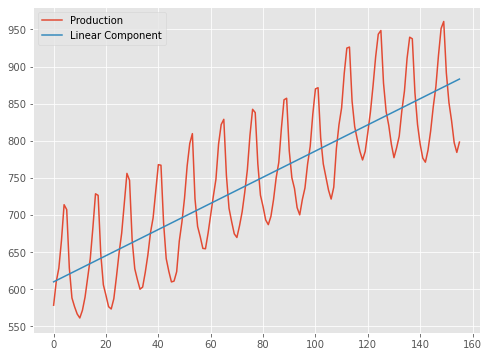

In [9]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(tsDF['Production'], label='Production')
    plt.plot(tsDF['lc'], label='Linear Component')
    plt.legend(loc=2)

In [10]:
tsDF['detrended'] = tsDF['Production']-tsDF['lc']

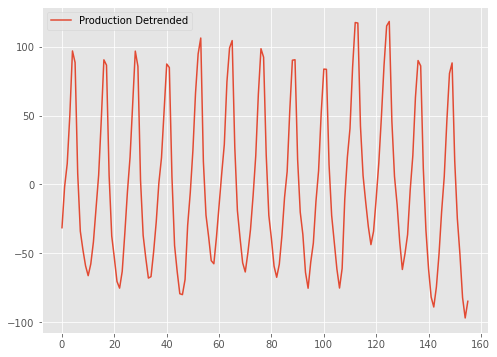

In [11]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(tsDF['detrended'], label='Production Detrended')
    plt.legend(loc=2)

## Calculating the Seasonal Component

In [12]:
# Calculate the seasonal component and remove it from the de-trended line
mavgDF = tsDF.groupby(['midx']).mean()
mavgDF = pd.concat([mavgDF]*13)['detrended']

In [13]:
tsDF['scomponent'] = mavgDF.values

In [14]:
tsDF.head(20)

,Month,Production,midx,period,lc,detrended,scomponent
0,1962-01,578.3,01,1,609.821027,-31.521027,-30.984768
1,1962-02,609.8,02,2,611.584519,-1.784519,-3.117491
2,1962-03,628.4,03,3,613.348012,15.051988,20.780556
3,1962-04,665.6,04,4,615.111504,50.488496,61.617064
4,1962-05,713.8,05,5,616.874996,96.925004,95.476648
5,1962-06,707.2,06,6,618.638488,88.561512,94.836233
6,1962-07,628.4,07,7,620.401980,7.998020,18.249664
7,1962-08,588.1,08,8,622.165472,-34.065472,-23.536905
8,1962-09,576.3,09,9,623.928964,-47.628964,-42.569628
9,1962-10,566.5,10,10,625.692456,-59.192456,-62.433120


In [15]:
tsDF['error'] = tsDF['detrended']-tsDF['scomponent']

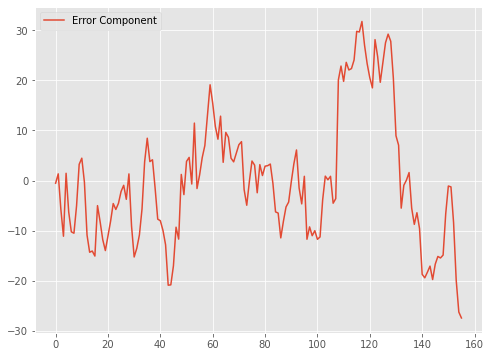

In [16]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(tsDF['error'], label='Error Component')
    plt.legend(loc=2)

In [17]:
tsDF['prediction'] = tsDF['lc']+tsDF['scomponent']

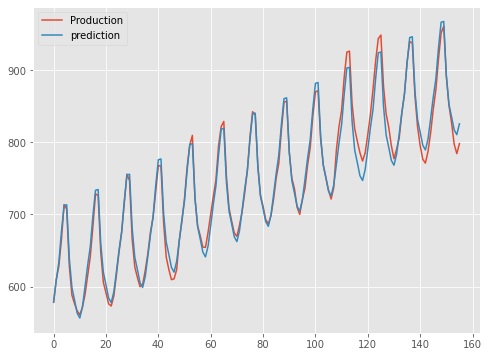

In [18]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(tsDF['Production'], label='Production')
    plt.plot(tsDF['prediction'], label='prediction')
    plt.legend(loc=2)